In [1]:
import requests
from bs4 import BeautifulSoup as BS
from selenium import webdriver
import time
from selenium.webdriver.chrome.options import Options
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import linregress
from scipy import stats
from scipy.stats import pearsonr
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from statsmodels.stats.multicomp import MultiComparison

In [11]:
from selenium import webdriver
chrome_path = r"/Users/agorina/Downloads/chromedriver"
driver = webdriver.Chrome(chrome_path)

In [135]:
dictionary = {'Alabama': [26.1, 27.8, .31, .269], 
              'Alaska': [25.5, 28.8, .5, .2], 
              'Arizona': [26.7, 28.7, .365, .271],
              'Arkanzas': [25.1, 26.7, .373, .356],
              'California': [27.9, 29.9, .329, .273],
              'Colorado': [26.5, 28.6, .327, .286],
              'Connecticut': [28.7, 30.4, .329, .339],
              'Delaware': [28, 29.7, .349, .367],
              'Florida': [27.7, 29.9, .342, .246],
              'Georgia': [26.8, 28.7, .351, .399],
              'Hawaii': [26.7, 28.3, .357, .218],
              'Idaho': [24.7, 26.2, .293, .333],
              'Illinois': [27.9, 29.7, .377, .257],
              'Indiana': [26.4, 28, .404, .268],
              'Iowa': [25.9, 27.8, .313, .196],
              'Kansas': [25.7, 27.3, .29, .23],
              'Kentucky': [25.7, 27.4, .375, .31],
              'Louisiana': [27.3, 28.9, .334, .284],
              'Maine': [27.3, 29.2, .366, .267],
              'Maryland': [28.1, 29.9, .421, .272],
              'Massachusetts': [29.3, 30.5, .317, .192],
              'Michigan': [27.3, 29.4, .418, .23],
              'Minnesota': [26.9, 28.9, .337, .235],
              'Mississipi': [26.3, 28, .401, .258],
              'Missouri': [26.5, 28, .361, .404],
              'Montana': [26, 28.4, .392, .326],
              'Nebraska': [26, 27.5, .385, .261],
              'Nevada': [26.6, 28.8, .481, .309],
              'New Hampshire': [27.2, 29.5, .404, .378],
              'New Jersey': [28.6, 30.4, .262, .293],
              'New Mexico': [26.8, 28.5, .344, .291],
              'New York': [29.1, 30.6, .323, .335],
              'North Carolina': [26.6, 28.5, .439, .193],
              'North Dakota': [26, 27.5, .253, .261],
              'Ohio': [26.9, 28.9, .356, .3],
              'Oklahoma': [25.2, 26.8, .491, .407],
              'Oregon': [27.1, 29, .373, .336],
              'Pennsylvania': [28, 29.7, .377, .275],
              'Rhode Island': [29, 30.5, .299, .193],
              'South Carolina': [27.3, 28.8, .415, .174],
              'South Dakota': [25.8, 27.8, .337, .302],
              'Tennessee': [26.1, 27.8, .4, .325],
              'Texas': [26.1, 27.8, .345, .351],
              'Utah': [23.8, 25.9, .369, .196],
              'Vermont': [27.8, 30.2, .336, .2],
              'Virginia': [26.3, 29, .313, .221],
              'Washington': [26.4, 28.5, .426, .283],
              'West Virginia': [26, 27.9, .336, .412],
              'Wisconsin': [27, 29, .324, .23],
              'Wyoming': [25.2, 26.8, .358, .358]}

In [8]:
len(dictionary)

50

In [136]:
table = pd.DataFrame.from_dict(dictionary, orient='index', columns=['Marriage age women', 'Marriage age men', 'DV incidents women', 'DV incidents men'])

In [137]:
table

,Marriage age women,Marriage age men,DV incidents women,DV incidents men
Alabama,26.1,27.8,0.310,0.269
Alaska,25.5,28.8,0.500,0.200
Arizona,26.7,28.7,0.365,0.271
Arkanzas,25.1,26.7,0.373,0.356
California,27.9,29.9,0.329,0.273
Colorado,26.5,28.6,0.327,0.286
Connecticut,28.7,30.4,0.329,0.339
Delaware,28.0,29.7,0.349,0.367
Florida,27.7,29.9,0.342,0.246
Georgia,26.8,28.7,0.351,0.399


/Users/agorina/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


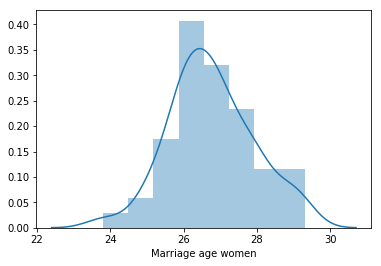

In [11]:
histogram_women = sns.distplot(table['Marriage age women'])

/Users/agorina/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


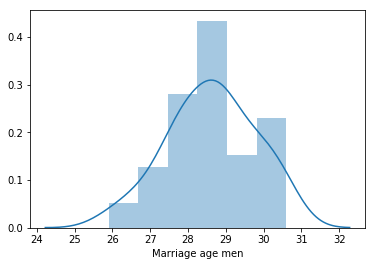

In [12]:
histogram_men = sns.distplot(table['Marriage age men'])

/Users/agorina/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


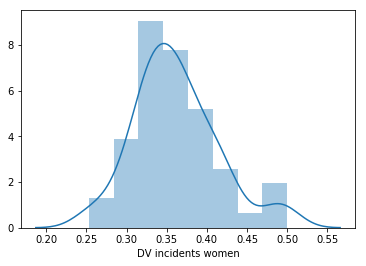

In [13]:
dv_women = sns.distplot(table['DV incidents women'])

In [15]:
table.to_csv(r'/Users/agorina/Desktop/Flatiron/export_table.csv')

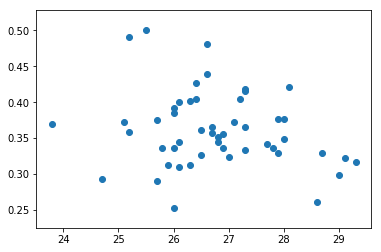

In [16]:
plot_women = plt.scatter(table['Marriage age women'], table['DV incidents women'])

In [141]:
def regression(x, y, color):
    reg = linregress(x, y)
    corr, _ = pearsonr(x, y)
    if corr > 0:
        print('Positive correlation')
    elif corr < 0:
        print('Negative correlation')
    else:
        print('No correlation')
    print('Pearsons correlation: %.3f' % corr)
    print(reg)
    sns.regplot(x, y, color=color)

Negative correlation
Pearsons correlation: -0.214
LinregressResult(slope=-0.009673593845573305, intercept=0.6203860241198507, rvalue=-0.2137533419158429, pvalue=0.136086893578786, stderr=0.006381149839985313)


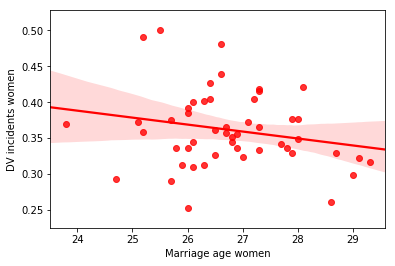

In [139]:
regression(table['Marriage age women'], table['DV incidents women'], 'red')

Negative correlation
Pearsons correlation: -0.205
LinregressResult(slope=-0.011292348989998043, intercept=0.606541858697784, rvalue=-0.20524022868667818, pvalue=0.15276489012192304, stderr=0.007772414094125116)


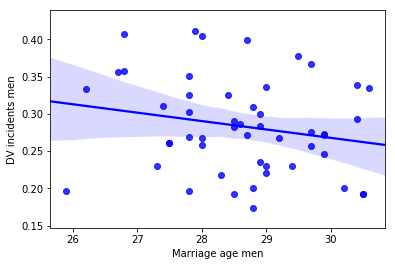

In [140]:
regression(table['Marriage age men'], table['DV incidents men'], 'blue')

In [142]:
table['Age Difference'] = table['Marriage age men'] - table['Marriage age women']

In [143]:
table['DV incidents total'] = table['DV incidents women'] + table['DV incidents men']
table

,Marriage age women,Marriage age men,DV incidents women,DV incidents men,Age Difference,DV incidents total
Alabama,26.1,27.8,0.310,0.269,1.7,0.579
Alaska,25.5,28.8,0.500,0.200,3.3,0.700
Arizona,26.7,28.7,0.365,0.271,2.0,0.636
Arkanzas,25.1,26.7,0.373,0.356,1.6,0.729
California,27.9,29.9,0.329,0.273,2.0,0.602
Colorado,26.5,28.6,0.327,0.286,2.1,0.613
Connecticut,28.7,30.4,0.329,0.339,1.7,0.668
Delaware,28.0,29.7,0.349,0.367,1.7,0.716
Florida,27.7,29.9,0.342,0.246,2.2,0.588
Georgia,26.8,28.7,0.351,0.399,1.9,0.750


Positive correlation
Pearsons correlation: 0.071
LinregressResult(slope=0.017055371021316386, intercept=0.6132511206423941, rvalue=0.07138861517728347, pvalue=0.6222560795298774, stderr=0.034395538312183026)


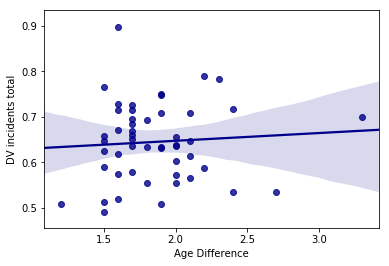

In [144]:
regression(table['Age Difference'], table['DV incidents total'], 'darkblue')

In [38]:
response = requests.get('https://data.cityofnewyork.us/resource/bray-s6dc.json')
print(response.status_code)

200


In [39]:
response.status_code == requests.codes.ok

True

In [40]:
print(response.content)

b'[{"visit_year":"2017","foreign_born":"7637","us_born":"5054","foreign_born_new_client":"4213","foreign_born_return_client":"3424","fjc_fb_visit_bronx":"1907","fjc_fb_visit_brooklyn":"2348","fjc_fb_visit_manhattan":"1168","fjc_fb_visit_queens":"2201","fjc_fb_visit_staten_island":"411","fb_age_under_20":"77","fb_age_20_29":"1332","fb_age_30_39":"3019","fb_age_40_49":"2043","fb_age_50_59":"822","fb_age_over_60":"329","fb_lang_spanish":"3437","fb_lang_english":"2659","fb_lang_mandarin":"298","fb_lang_russian":"164","fb_lang_arabic":"136","fb_lang_bengali":"135","fb_lang_french":"105","fb_lang_other":"704","fb_country_mexico":"1216","fb_country_dominican_repub":"1093","fb_country_jamaica":"528","fb_country_ecuador":"496","fb_country_china":"362","fb_country_honduras":"293","fb_country_guyana":"266","fb_country_colombia":"259","fb_country_trin_tobago":"241","fb_country_bangladesh":"184","fb_relationship_dating":"342","fb_relationship_spouse":"3743","fb_relationship_ex_dating":"319","fb_rel

In [42]:
import json

In [43]:
result = json.loads(response.content)
result

[{'visit_year': '2017',
  'foreign_born': '7637',
  'us_born': '5054',
  'foreign_born_new_client': '4213',
  'foreign_born_return_client': '3424',
  'fjc_fb_visit_bronx': '1907',
  'fjc_fb_visit_brooklyn': '2348',
  'fjc_fb_visit_manhattan': '1168',
  'fjc_fb_visit_queens': '2201',
  'fjc_fb_visit_staten_island': '411',
  'fb_age_under_20': '77',
  'fb_age_20_29': '1332',
  'fb_age_30_39': '3019',
  'fb_age_40_49': '2043',
  'fb_age_50_59': '822',
  'fb_age_over_60': '329',
  'fb_lang_spanish': '3437',
  'fb_lang_english': '2659',
  'fb_lang_mandarin': '298',
  'fb_lang_russian': '164',
  'fb_lang_arabic': '136',
  'fb_lang_bengali': '135',
  'fb_lang_french': '105',
  'fb_lang_other': '704',
  'fb_country_mexico': '1216',
  'fb_country_dominican_repub': '1093',
  'fb_country_jamaica': '528',
  'fb_country_ecuador': '496',
  'fb_country_china': '362',
  'fb_country_honduras': '293',
  'fb_country_guyana': '266',
  'fb_country_colombia': '259',
  'fb_country_trin_tobago': '241',
  'fb_

In [83]:
r = result[0].keys()

In [84]:
dict_0 = result[0]

In [77]:
len(result)

8

In [79]:
for i in range(len(result)):
    print(result[i].keys())

dict_keys(['visit_year', 'foreign_born', 'us_born', 'foreign_born_new_client', 'foreign_born_return_client', 'fjc_fb_visit_bronx', 'fjc_fb_visit_brooklyn', 'fjc_fb_visit_manhattan', 'fjc_fb_visit_queens', 'fjc_fb_visit_staten_island', 'fb_age_under_20', 'fb_age_20_29', 'fb_age_30_39', 'fb_age_40_49', 'fb_age_50_59', 'fb_age_over_60', 'fb_lang_spanish', 'fb_lang_english', 'fb_lang_mandarin', 'fb_lang_russian', 'fb_lang_arabic', 'fb_lang_bengali', 'fb_lang_french', 'fb_lang_other', 'fb_country_mexico', 'fb_country_dominican_repub', 'fb_country_jamaica', 'fb_country_ecuador', 'fb_country_china', 'fb_country_honduras', 'fb_country_guyana', 'fb_country_colombia', 'fb_country_trin_tobago', 'fb_country_bangladesh', 'fb_relationship_dating', 'fb_relationship_spouse', 'fb_relationship_ex_dating', 'fb_relationship_ex_spouse', 'fb_relationship_child_common', 'fb_relationship_living', 'fb_services_risk_assessment', 'fb_services_safety_planning', 'fb_services_group_individual', 'fb_services_imm_civ

In [50]:
dict_1 = {}

result[7].keys()

dict_keys(['visit_year', 'foreign_born', 'us_born'])

In [51]:
dict_1 = result[1]
dict_2 = result[2]
dict_3 = result[3]
dict_4 = result[4]
dict_5 = result[5]
dict_6 = result[6]
dict_7 = result[7]


dict_1

{'visit_year': '2016',
 'foreign_born': '7728',
 'us_born': '4779',
 'foreign_born_new_client': '4716',
 'foreign_born_return_client': '3012'}

In [92]:
df_0 = pd.DataFrame.from_dict(dict_0, orient='index')
df0 = df_0[:3].transpose()

df0

,visit_year,foreign_born,us_born
0,2017,7637,5054


In [52]:
#df_0 = pd.DataFrame.from_dict(dict_0, orient='index', index=['visit_year', 'foreign_born', 'us_born'])
df_1 = pd.DataFrame.from_dict(dict_1, orient='index') 
df_2 = pd.DataFrame.from_dict(dict_2, orient='index') 
df_3 = pd.DataFrame.from_dict(dict_3, orient='index') 
df_4 = pd.DataFrame.from_dict(dict_4, orient='index') 
df_5 = pd.DataFrame.from_dict(dict_5, orient='index') 
df_6 = pd.DataFrame.from_dict(dict_6, orient='index') 
df_7 = pd.DataFrame.from_dict(dict_7, orient='index') 


In [55]:
df1 = df_1.transpose()
df2 = df_2.transpose()
df3 = df_3.transpose()
df4 = df_4.transpose()
df5 = df_5.transpose()
df6 = df_6.transpose()
df7 = df_7.transpose()


In [72]:
df1d = df1.drop(['foreign_born_new_client', 'foreign_born_return_client'], axis=1)

In [73]:
df2d = df2.drop(['foreign_born_new_client', 'foreign_born_return_client'], axis=1)

In [74]:
df3d = df3.drop(['foreign_born_new_client', 'foreign_born_return_client'], axis=1)

In [75]:
df4d = df4.drop(['foreign_born_new_client', 'foreign_born_return_client'], axis=1)

In [76]:
df5d = df5.drop(['foreign_born_new_client', 'foreign_born_return_client'], axis=1)

In [77]:
df6d = df6.drop(['foreign_born_new_client', 'foreign_born_return_client'], axis=1)

In [79]:
type(df7)

pandas.core.frame.DataFrame

In [145]:
dfs = [df0, df1d, df2d, df3d, df4d, df5d,df6d, df7]
dfm = pd.concat(dfs)

dfm.reset_index(inplace=True)
dfn = dfm.drop(['index'], axis = 1)
dfn

,visit_year,foreign_born,us_born
0,2017,7637,5054
1,2016,7728,4779
2,2015,6759,4312
3,2014,5787,3796
4,2013,4721,2958
5,2012,4744,3347
6,2011,4344,3066
7,2010,3287,1942


In [142]:
dfn

,visit_year,foreign_born,us_born
0,2017,7637,5054
1,2016,7728,4779
2,2015,6759,4312
3,2014,5787,3796
4,2013,4721,2958
5,2012,4744,3347
6,2011,4344,3066
7,2010,3287,1942


In [146]:
dfn.dtypes

visit_year      object
foreign_born    object
us_born         object
dtype: object

In [154]:
dfnn = dfn.apply(pd.to_numeric)

In [155]:
dfnn.dtypes

visit_year      int64
foreign_born    int64
us_born         int64
dtype: object

In [156]:
dfnn

,visit_year,foreign_born,us_born
0,2017,7637,5054
1,2016,7728,4779
2,2015,6759,4312
3,2014,5787,3796
4,2013,4721,2958
5,2012,4744,3347
6,2011,4344,3066
7,2010,3287,1942


In [157]:
dfnn.to_csv(r'/Users/agorina/Desktop/Flatiron/foreign_vs_us.csv')

In [158]:
dframe = pd.read_csv('foreign_vs_us.csv', index_col=1)
dataframe = dframe.drop(['Unnamed: 0'], axis=1)

dataframe
#dfn = dfm.drop(['index'], axis = 1)


,foreign_born,us_born
visit_year,,
2017,7637,5054
2016,7728,4779
2015,6759,4312
2014,5787,3796
2013,4721,2958
2012,4744,3347
2011,4344,3066
2010,3287,1942


In [159]:
f = dataframe['foreign_born']
u = dataframe['us_born']

/Users/agorina/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/agorina/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


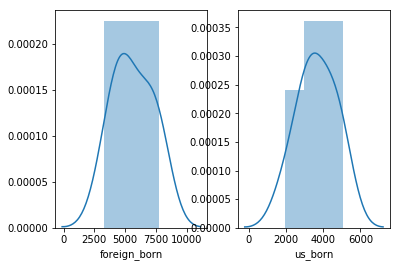

In [160]:
fig, (ax1, ax2) = plt.subplots(1, 2)

sns.distplot(f, ax=ax1)
sns.distplot(u, ax=ax2)

plt.show()

In [161]:
stats.ttest_ind(f, u)

Ttest_indResult(statistic=2.8889092346451926, pvalue=0.011899969249814181)

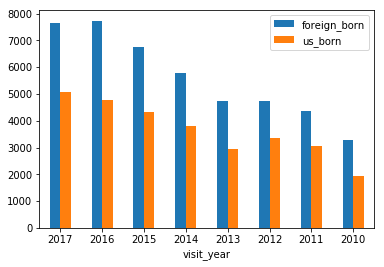

In [162]:
ax = dataframe.plot.bar(rot=0)

In [44]:
f_mean = f.mean()
f_sd = f.std()

f_visits = stats.norm(f_mean, f_sd)

u_mean = u.mean()
u_sd = u.std()
u_visits = stats.norm(u_mean, u_sd)


In [45]:
def cohen_d(group1, group2):

    diff = group1.mean() - group2.mean()

    n1 = len(group1)
    n2 = len(group2)
    var1 = group1.var()
    var2 = group2.var()

    # Calculate the pooled threshold as shown earlier
    pooled_var = ((n1-1) * var1 + (n2-1) * var2) / (n1 + n2 - 1 - 1)

    # Calculate Cohen's d statistic
    d = diff / np.sqrt(pooled_var)

    return d

In [46]:
effect = cohen_d(f, u)
effect

1.4444546173225963

In [47]:
def evaluate_pdf(rv, x=4):
   
    mean = rv.mean()
    std = rv.std()

    # Use numpy to calculate evenly spaced numbers over the specified interval (4 sd) and generate 100 samples.
    xs = np.linspace(mean - x*std, mean + x*std, 100)

    # Calculate the peak of normal distribution i.e. probability density.
    ys = rv.pdf(xs)

    return xs, ys

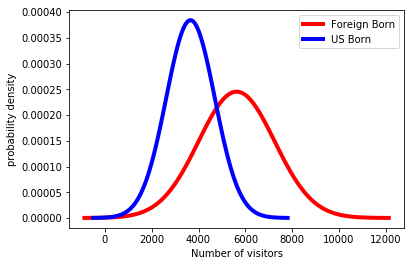

In [52]:
xs, ys = evaluate_pdf(f_visits)
plt.plot(xs, ys, label='Foreign Born', linewidth=4, color='r') 


xs, ys = evaluate_pdf(u_visits)
plt.plot(xs, ys, label='US Born', linewidth=4, color='b')

plt.xlabel('Number of visitors')
plt.ylabel('probability density')
plt.legend()
plt.show()

In [53]:
def plot_pdfs(cohen_d):
   
    group1 = stats.norm(0, 1)
    group2 = stats.norm(cohen_d, 1)
    xs, ys = evaluate_pdf(group1)
    plt.fill_between(xs, ys, label='Standard Normal', color='r', alpha=0.7)

    xs, ys = evaluate_pdf(group2)
    plt.fill_between(xs, ys, label='Cohens d', color='k', alpha=0.7)
    plt.legend()

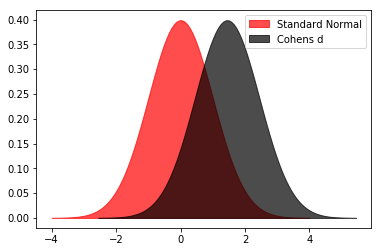

In [54]:
plot_pdfs(effect)

In [2]:
cddf = pd.read_csv('CD_indicators.csv')

In [3]:
cddf.head()

,area_sqmi,borocd,cd_short_title,cd_tot_bldgs,cd_tot_resunits,count_hosp_clinic,count_libraries,count_parks,count_public_schools,crime_count,...,son_issue_1,son_issue_2,son_issue_3,total_lot_area,under18_rate,under18_rate_boro,under18_rate_nyc,unemployment_boro,unemployment_cd,unemployment_nyc
0,1.5,101,Manhattan CD 1,1729,39547,7,1,28,22,1099,...,Resiliency,Traffic,Other,36115322,12.8,14.5,21,4.2,2.8,4.9
1,1.4,102,Manhattan CD 2,5360,60146,14,4,16,11,2353,...,Affordable housing,Parks,Schools,25696432,12.8,14.5,21,4.2,2.8,4.9
2,1.7,103,Manhattan CD 3,4680,79856,34,5,39,46,2375,...,Affordable housing,Senior services,Other,33692052,11.7,14.5,21,4.2,4.1,4.9
3,1.8,104,Manhattan CD 4,3925,85030,25,2,23,30,2462,...,Affordable housing,Neighborhood preservation (development trends),Traffic,38177268,8.2,14.5,21,4.2,3.7,4.9
4,1.6,105,Manhattan CD 5,3207,45268,17,7,10,15,4600,...,Affordable housing,Social services (including services for the ho...,Transit (buses & subways),28192622,8.2,14.5,21,4.2,3.7,4.9


In [55]:
cddf.tail()

,area_sqmi,borocd,cd_short_title,cd_tot_bldgs,cd_tot_resunits,count_hosp_clinic,count_libraries,count_parks,count_public_schools,crime_count,...,son_issue_1,son_issue_2,son_issue_3,total_lot_area,under18_rate,under18_rate_boro,under18_rate_nyc,unemployment_boro,unemployment_cd,unemployment_nyc
54,12.6,413,Queens CD 13,69527,60790,6,7,15,48,1698,...,"Commercial development (retail mix, small busi...",Neighborhood preservation (development trends),Traffic,239725268,19.9,20.2,21,4.4,5.0,4.9
55,7.0,414,Queens CD 14,20655,46240,13,6,13,35,1278,...,Resiliency,Transit (buses & subways),Unemployment,204764322,27.4,20.2,21,4.4,5.1,4.9
56,13.5,501,Staten Island CD 1,49028,64754,21,8,55,28,1609,...,Traffic,Transit (buses & subways),Other,312169271,23.5,22.1,21,3.2,3.3,4.9
57,21.3,502,Staten Island CD 2,39870,49152,22,4,26,19,666,...,Senior services,Traffic,Other,457047905,21.1,22.1,21,3.2,3.2,4.9
58,21.5,503,Staten Island CD 3,51472,60642,1,5,62,25,485,...,Street conditions (roadway maintenance),Street flooding,Traffic,476202613,21.5,22.1,21,3.2,3.2,4.9


In [5]:
ivpdf = pd.read_csv('IPV_17_18.csv')

In [6]:
ivpdf.head()

,Report_Year,Comm_Dist_ Boro,Comm_District,IPV_DIR,IPV_Fel_Assault,DV_Fel_Assault,IPV_Rape,DV_Rape
0,2017,Bronx,1,2973,190,299,10,17
1,2017,Bronx,2,1520,66,106,5,9
2,2017,Bronx,3,2892,125,190,7,10
3,2017,Bronx,4,3095,119,206,4,10
4,2017,Bronx,5,2884,171,244,9,14


In [212]:
#new = old[['A', 'C', 'D']].copy()


to_plot_1 = ivpdf[['Report_Year', 'IPV_DIR']].copy()
# to_plot_1(index_col='Report_Year')

t = to_plot_1.set_index('Report_Year')

tp = t.groupby('Report_Year')['IPV_DIR'].mean()


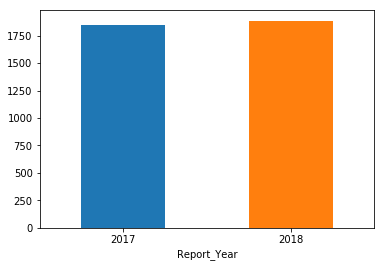

In [213]:
a = tp.plot.bar(rot=0)

LinregressResult(slope=-9.332028626743994e-05, intercept=20.092168424709094, rvalue=-0.0097853869206806, pvalue=0.9413632740277107, stderr=0.0012631061166267113)


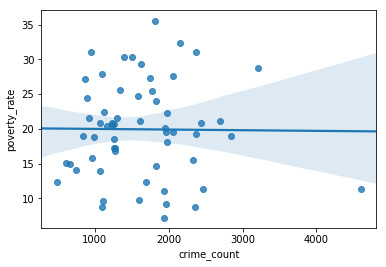

In [8]:
xp = cddf['crime_count']
yc = cddf['poverty_rate']


regression = linregress(xp, yc)
print(regression)

sns.regplot(xp, yc)

LinregressResult(slope=-5.175851272402715e-31, intercept=19.799999999999997, rvalue=-5.69725620965546e-16, pvalue=0.9999999999999966, stderr=1.2033130042554753e-16)


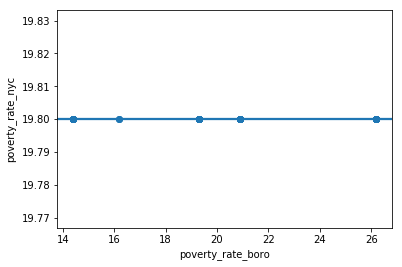

In [9]:
x = cddf['poverty_rate_boro']
y = cddf['poverty_rate_nyc']


regression = linregress(x, y)
print(regression)

sns.regplot(x, y)

In [14]:
ivpdf.groupby('Report_Year')['IPV_DIR'].mean()

Report_Year
2017    1842.491525
2018    1884.271186
Name: IPV_DIR, dtype: float64

In [15]:
ivpdf.groupby('Report_Year')['IPV_DIR'].count()

Report_Year
2017    59
2018    59
Name: IPV_DIR, dtype: int64

/Users/agorina/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


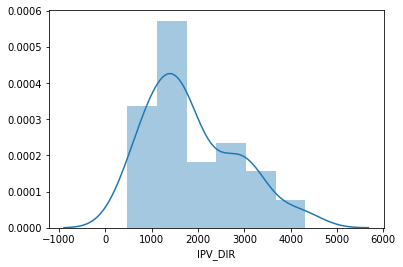

In [17]:
#histogram_women = sns.distplot(table['Marriage age women'])
ipv17 = ivpdf['IPV_DIR'].head(60)

ipv18 = ivpdf['IPV_DIR'].tail(60)


sns.distplot(ipv17)

/Users/agorina/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


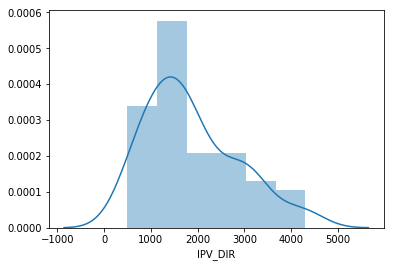

In [18]:
sns.distplot(ipv18)

/Users/agorina/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/agorina/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


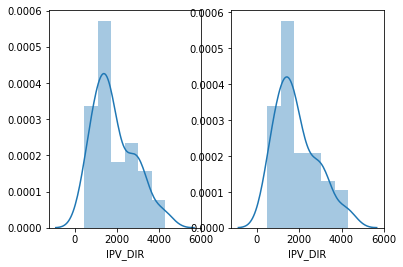

In [19]:
fig, (ax1, ax2) = plt.subplots(1, 2)

sns.distplot(ipv17, ax=ax1)
sns.distplot(ipv18, ax=ax2)

plt.show()

In [25]:
stats.ttest_ind(ipv17, ipv18)

Ttest_indResult(statistic=-0.05381039873158967, pvalue=0.9571772211349411)

In [26]:
print('Failed to reject the null since p-value > alpha')

Failed to reject the null since p-value > alpha


In [2]:
bigdf = pd.read_csv('Expanded_Table.csv')

In [3]:
bigdf

,borocd,cd_short_title,IPV_DIR,FAM_DIR,FAM_Fel_Assault,DV_Fel_Assault,FAM_Rape,DV_Rape,lots_parking,acres,...,son_issue_1,son_issue_2,son_issue_3,total_lot_area,under18_rate,under18_rate_boro,under18_rate_nyc,unemployment_boro,unemployment_cd,unemployment_nyc
0,101,Manhattan CD 1,623,121,2,18,0,0,23,976.3,...,Resiliency,Traffic,Other,36115322,12.8,14.5,21,4.2,2.8,4.9
1,102,Manhattan CD 2,492,159,4,19,0,0,52,865.9,...,Affordable housing,Parks,Schools,25696432,12.8,14.5,21,4.2,2.8,4.9
2,103,Manhattan CD 3,1760,1497,51,123,3,18,57,1076.9,...,Affordable housing,Senior services,Other,33692052,11.7,14.5,21,4.2,4.1,4.9
3,104,Manhattan CD 4,1317,568,7,58,2,10,77,1131.6,...,Affordable housing,Neighborhood preservation (development trends),Traffic,38177268,8.2,14.5,21,4.2,3.7,4.9
4,105,Manhattan CD 5,825,251,9,38,1,5,39,1005.4,...,Affordable housing,Social services (including services for the ho...,Transit (buses & subways),28192622,8.2,14.5,21,4.2,3.7,4.9
5,106,Manhattan CD 6,813,322,11,32,0,2,22,888.5,...,Affordable housing,Parks,Senior services,25705923,8.7,14.5,21,4.2,2.4,4.9
6,107,Manhattan CD 7,1363,1066,26,71,2,7,19,1220.2,...,Affordable housing,Schools,Social services (including services for the ho...,64880905,15.1,14.5,21,4.2,3.4,4.9
7,108,Manhattan CD 8,862,404,12,54,1,1,29,1266.3,...,Affordable housing,Parks,Schools,37514104,14.8,14.5,21,4.2,2.1,4.9
8,109,Manhattan CD 9,1502,1394,38,103,1,7,32,961.7,...,Affordable housing,Crime,Unemployment,24139761,15.4,14.5,21,4.2,4.1,4.9
9,110,Manhattan CD 10,3032,3092,71,191,3,13,28,897.1,...,Affordable housing,"Commercial development (retail mix, small busi...",Trash removal & cleanliness,26501338,20.3,14.5,21,4.2,6.9,4.9


In [136]:
bigdf.shape

(59, 181)

Positive correlation
Pearsons correlation: 0.668
LinregressResult(slope=0.0012146606363008965, intercept=3.296330892551122, rvalue=0.6680509442386836, pvalue=7.448674332000646e-09, stderr=0.00017920425672385637)


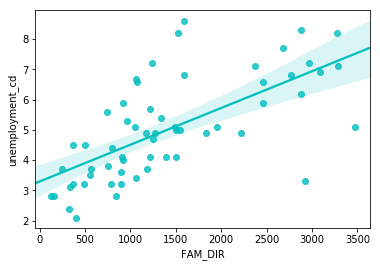

In [163]:
regression(bigdf['FAM_DIR'], bigdf['unemployment_cd'], 'c')

In [4]:
def regression(x, y, color):
    reg = linregress(x, y)
    corr, _ = pearsonr(x, y)
    if corr > 0:
        print('Positive correlation')
    elif corr < 0:
        print('Negative correlation')
    else:
        print('No correlation')
    print('Pearsons correlation: %.3f' % corr)
    print(reg)
    sns.regplot(x, y, color=color)

Positive correlation
Pearsons correlation: 0.562
LinregressResult(slope=6.943290355919067, intercept=-4.988371955119376, rvalue=0.5620365356304844, pvalue=3.6206171262185817e-06, stderr=1.3534053413798297)


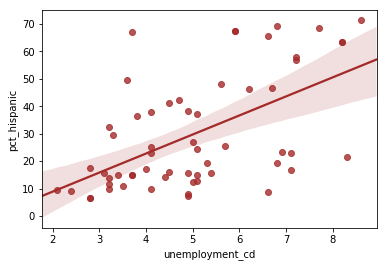

In [5]:
regression(bigdf['unemployment_cd'], bigdf['pct_hispanic'], 'brown')

In [9]:
bigdf['fp_100_mhhi'].fillna(bigdf['fp_100_mhhi'].mean(), inplace=True)

Negative correlation
Pearsons correlation: -0.296
LinregressResult(slope=-1.9776679612418049, intercept=215.87392629321639, rvalue=-0.29643402706998284, pvalue=0.022623164699127462, stderr=0.8439476735834545)


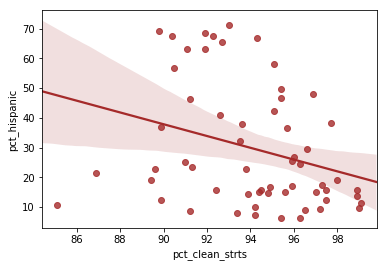

In [12]:
regression(bigdf['pct_clean_strts'], bigdf['pct_hispanic'], 'brown')

Positive correlation
Pearsons correlation: 0.474
LinregressResult(slope=1.7800728950032405, intercept=31.935566492865107, rvalue=0.47439686736169207, pvalue=0.0001471365574047847, stderr=0.4375167850785688)


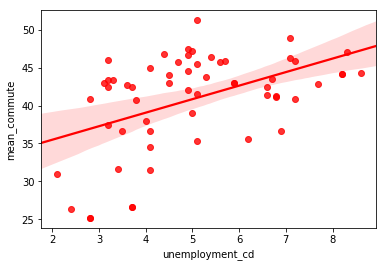

In [116]:
regression(bigdf['unemployment_cd'], bigdf['mean_commute'], 'r')

Positive correlation
Pearsons correlation: 0.385
LinregressResult(slope=0.0029070436226701015, intercept=39.586748243737624, rvalue=0.385373117030783, pvalue=0.002577202697932745, stderr=0.0009219807617972702)


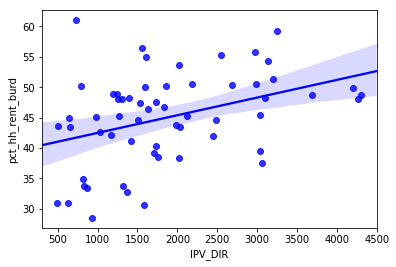

In [117]:
regression(bigdf['IPV_DIR'], bigdf['pct_hh_rent_burd'], 'b')

Positive correlation
Pearsons correlation: 0.366
LinregressResult(slope=0.7570190875863004, intercept=41.53592798158928, rvalue=0.3662111297676201, pvalue=0.00433692173119838, stderr=0.2547821961309472)


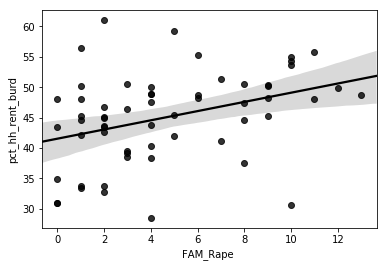

In [118]:
regression(bigdf['FAM_Rape '], bigdf['pct_hh_rent_burd'], 'k')

Negative correlation
Pearsons correlation: -0.364
LinregressResult(slope=-0.0011339081005170843, intercept=96.20099714153702, rvalue=-0.3635345435604164, pvalue=0.00465265248339715, stderr=0.00038487104303459526)


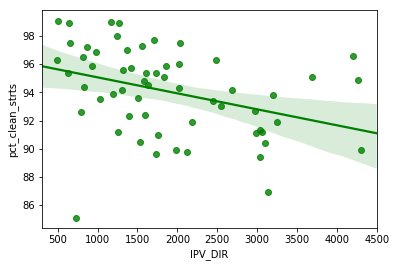

In [119]:
regression(bigdf['IPV_DIR'], bigdf['pct_clean_strts'], 'g')

Positive correlation
Pearsons correlation: 0.437
LinregressResult(slope=0.31701583122507976, intercept=1025.9951866278889, rvalue=0.4368700778951092, pvalue=0.0005412848007601826, stderr=0.08645781893808659)


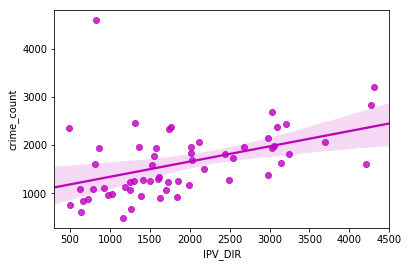

In [120]:
regression(bigdf['IPV_DIR'], bigdf['crime_count'], 'm')

Positive correlation
Pearsons correlation: 0.294
LinregressResult(slope=0.0031223098010831883, intercept=12.726891098203046, rvalue=0.2941056715448928, pvalue=0.023759696476865332, stderr=0.0013439709499359913)


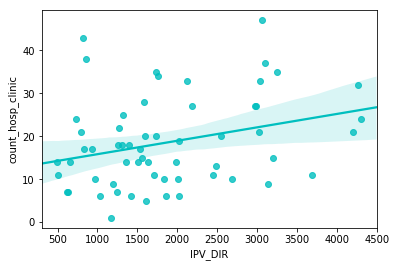

In [121]:
regression(bigdf['IPV_DIR'], bigdf['count_hosp_clinic'], 'c')

Positive correlation
Pearsons correlation: 0.517
LinregressResult(slope=1.6167140472000359, intercept=23.98989215288119, rvalue=0.5170463768673246, pvalue=2.7545081228606325e-05, stderr=0.354501786223812)


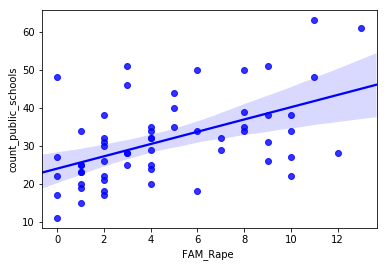

In [123]:
regression(bigdf['FAM_Rape '], bigdf['count_public_schools'], 'b')

In [112]:
list(bigdf.dtypes)

[dtype('int64'),
 dtype('O'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('float64'),
 dtype('int64'),
 dtype('int64'),
 dtype('float64'),
 dtype(

Positive correlation
Pearsons correlation: 0.193
LinregressResult(slope=0.7050832543657779, intercept=19.132239068634085, rvalue=0.19273801550528133, pvalue=0.14359738586617868, stderr=0.47546151609735876)


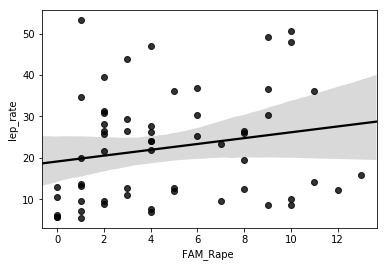

In [124]:
regression(bigdf['FAM_Rape '], bigdf['lep_rate'], 'k')

Positive correlation
Pearsons correlation: 0.379
LinregressResult(slope=0.007880726900065995, intercept=14.996336085862092, rvalue=0.37871175037518806, pvalue=0.003099182278599607, stderr=0.002550958409487174)


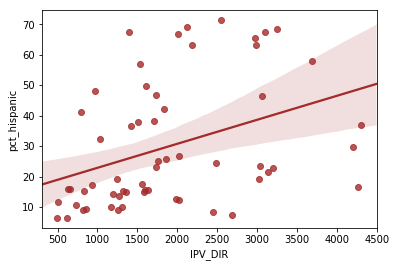

In [125]:
regression(bigdf['IPV_DIR'], bigdf['pct_hispanic'], 'brown')

Negative correlation
Pearsons correlation: -0.492
LinregressResult(slope=-13.118878261846033, intercept=71812.54756303341, rvalue=-0.492032395437153, pvalue=7.558969320354674e-05, stderr=3.0744873534746793)


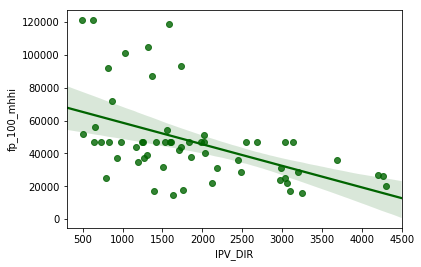

In [126]:
regression(bigdf['IPV_DIR'], bigdf['fp_100_mhhi'], 'darkgreen')

In [151]:
list(bigdf.columns.values)


['borocd',
 'cd_short_title',
 'IPV_DIR',
 'FAM_DIR',
 'FAM_Fel_Assault ',
 'DV_Fel_Assault ',
 'FAM_Rape ',
 'DV_Rape ',
 'lots_parking',
 'acres',
 'area_sqmi',
 'cd_tot_bldgs',
 'cd_tot_resunits',
 'count_hosp_clinic',
 'count_libraries',
 'count_parks',
 'count_public_schools',
 'crime_count',
 'crime_count_boro',
 'crime_count_nyc',
 'crime_per_1000',
 'crime_per_1000_boro',
 'crime_per_1000_nyc',
 'female_10_14',
 'female_15_19',
 'female_20_24',
 'female_25_29',
 'female_30_34',
 'female_35_39',
 'female_40_44',
 'female_45_49',
 'female_5_9',
 'female_50_54',
 'female_55_59',
 'female_60_64',
 'female_65_69',
 'female_70_74',
 'female_75_79',
 'female_80_84',
 'female_85_over',
 'female_under_5',
 'fp_100_area',
 'fp_100_bldg',
 'fp_100_cost_burden',
 'fp_100_cost_burden_value',
 'fp_100_mhhi',
 'fp_100_mortg_value',
 'fp_100_openspace',
 'fp_100_ownerocc',
 'fp_100_ownerocc_value',
 'fp_100_permortg',
 'fp_100_pop',
 'fp_100_rent_burden',
 'fp_100_rent_burden_value',
 'fp_100_

In [7]:
bigdf['fp_100_mhhi'].fillna(bigdf['fp_100_mhhi'].mean(), inplace=True)

In [144]:
bigdf['fp_100_mhhi']

0     121000.000000
1     121000.000000
2      18000.000000
3     105000.000000
4      47093.023256
5      92000.000000
6      87000.000000
7      72000.000000
8      32000.000000
9      25000.000000
10     22000.000000
11     22000.000000
12     17000.000000
13     17000.000000
14     31000.000000
15     24000.000000
16     16000.000000
17     31000.000000
18     47093.023256
19     47000.000000
20     36000.000000
21     42000.000000
22     44000.000000
23     29000.000000
24     93000.000000
25    119000.000000
26     47093.023256
27     47093.023256
28     20000.000000
29     37000.000000
30     25000.000000
31     47093.023256
32     47093.023256
33     56000.000000
34     35000.000000
35     47093.023256
36     15000.000000
37     47093.023256
38     39000.000000
39     47093.023256
40     47093.023256
41     36000.000000
42     51000.000000
43    101000.000000
44     47093.023256
45     47093.023256
46     47093.023256
47     47093.023256
48     54000.000000
49     47093.023256


Negative correlation
Pearsons correlation: -0.492
LinregressResult(slope=-13.118878261846033, intercept=71812.54756303341, rvalue=-0.492032395437153, pvalue=7.558969320354674e-05, stderr=3.0744873534746793)


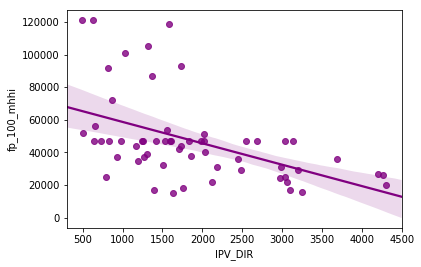

In [131]:
regression(bigdf['IPV_DIR'], bigdf['fp_100_mhhi'], 'purple')

In [146]:
income = bigdf.groupby('unemployment_boro')['fp_100_mhhi'].mean()

income

unemployment_boro
3.2    36000.000000
4.2    63674.418605
4.4    48111.295681
5.1    47319.121447
6.9    31757.751938
Name: fp_100_mhhi, dtype: float64

Text(0.5,1,'Income per boro')

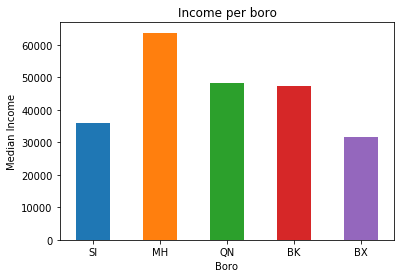

In [147]:
p = income.plot.bar(rot=0)
p.set_xticklabels( ("SI", 'MH', 'QN', 'BK', 'BX' ) )
p.set_xlabel('Boro')
p.set_ylabel('Median Income')
p.set_title('Income per boro')

Positive correlation
Pearsons correlation: 0.962
LinregressResult(slope=0.89112473807558, intercept=-262.5782945989556, rvalue=0.961893869652893, pvalue=8.669282909841235e-34, stderr=0.03355128010484888)


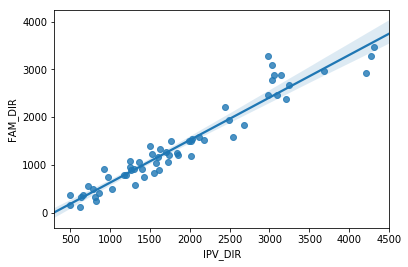

In [107]:
regression(bigdf['IPV_DIR'], bigdf['FAM_DIR'])

In [78]:
def comparison(x, y):
    matches=0
    mc = MultiComparison(x, y)
    mc_results = mc.tukeyhsd()
    comp = mc_results.summary()
    c = comp.as_csv()
    if 'True' in c:
        matches+=1
        print('Reject Null')
    else:
        print('Failed to Reject Null')
        
        
    print(matches)

    return mc_results.summary()

In [79]:
comparison(bigdf['IPV_DIR'], bigdf['unemployment_boro'])

Failed to Reject Null
0


group1,group2,meandiff,lower,upper,reject
3.2,4.2,-732.9167,-2477.942,1012.1087,False
3.2,4.4,-462.4048,-2182.3205,1257.511,False
3.2,5.1,-406.4444,-2092.2991,1279.4102,False
3.2,6.9,264.1667,-1480.8587,2009.192,False
4.2,4.4,270.5119,-792.9927,1334.0166,False
4.2,5.1,326.4722,-681.0186,1333.9631,False
4.2,6.9,997.0833,-106.5676,2100.7343,False
4.4,5.1,55.9603,-907.3852,1019.3058,False
4.4,6.9,726.5714,-336.9332,1790.0761,False
5.1,6.9,670.6111,-336.8797,1678.102,False


In [80]:
comparison(bigdf['FAM_DIR'], bigdf['unemployment_boro'])

Failed to Reject Null
0


group1,group2,meandiff,lower,upper,reject
3.2,4.2,-424.25,-2052.8394,1204.3394,False
3.2,4.4,-354.7619,-1959.9171,1250.3933,False
3.2,5.1,-105.0,-1678.3668,1468.3668,False
3.2,6.9,406.6667,-1221.9227,2035.256,False
4.2,4.4,69.4881,-923.0547,1062.0309,False
4.2,5.1,319.25,-621.0165,1259.5165,False
4.2,6.9,830.9167,-199.0937,1860.927,False
4.4,5.1,249.7619,-649.3048,1148.8287,False
4.4,6.9,761.4286,-231.1142,1753.9714,False
5.1,6.9,511.6667,-428.5998,1451.9332,False


In [81]:
#FAM_Fel_Assault	DV_Fel_Assault	FAM_Rape	DV_Rape	

comparison(bigdf['FAM_Fel_Assault '], bigdf['unemployment_boro'])

Reject Null
1


group1,group2,meandiff,lower,upper,reject
3.2,4.2,-2.6667,-67.2457,61.9124,False
3.2,4.4,20.5,-43.1498,84.1498,False
3.2,5.1,24.2222,-38.1671,86.6115,False
3.2,6.9,42.8333,-21.7457,107.4124,False
4.2,4.4,23.1667,-16.191,62.5243,False
4.2,5.1,26.8889,-10.3959,64.1736,False
4.2,6.9,45.5,4.6566,86.3434,True
4.4,5.1,3.7222,-31.9288,39.3733,False
4.4,6.9,22.3333,-17.0243,61.691,False
5.1,6.9,18.6111,-18.6736,55.8959,False


In [82]:
comparison(bigdf['DV_Fel_Assault '], bigdf['unemployment_boro'])

Reject Null
1


group1,group2,meandiff,lower,upper,reject
3.2,4.2,4.1667,-160.8452,169.1785,False
3.2,4.4,45.7619,-116.8756,208.3994,False
3.2,5.1,56.8889,-102.5277,216.3055,False
3.2,6.9,121.8333,-43.1785,286.8452,False
4.2,4.4,41.5952,-58.9711,142.1616,False
4.2,5.1,52.7222,-42.5474,147.9919,False
4.2,6.9,117.6667,13.304,222.0293,True
4.4,5.1,11.127,-79.9682,102.2222,False
4.4,6.9,76.0714,-24.4949,176.6378,False
5.1,6.9,64.9444,-30.3252,160.2141,False


In [83]:
comparison(bigdf['DV_Rape '], bigdf['unemployment_boro'])

Failed to Reject Null
0


group1,group2,meandiff,lower,upper,reject
3.2,4.2,-3.8333,-16.6968,9.0301,False
3.2,4.4,0.4524,-12.226,13.1307,False
3.2,5.1,-0.6111,-13.0384,11.8162,False
3.2,6.9,0.0833,-12.7801,12.9468,False
4.2,4.4,4.2857,-3.5539,12.1253,False
4.2,5.1,3.2222,-4.2045,10.6489,False
4.2,6.9,3.9167,-4.2189,12.0522,False
4.4,5.1,-1.0635,-8.1648,6.0378,False
4.4,6.9,-0.369,-8.2087,7.4706,False
5.1,6.9,0.6944,-6.7323,8.1212,False


In [84]:
comparison(bigdf['DV_Rape '], bigdf['puma'])

Reject Null
1


group1,group2,meandiff,lower,upper,reject
3701,3702,13.0,-10.2009,36.2009,False
3701,3703,2.0,-21.2009,25.2009,False
3701,3704,5.0,-18.2009,28.2009,False
3701,3705,6.5,-13.5925,26.5925,False
3701,3706,4.0,-19.2009,27.2009,False
3701,3707,7.0,-16.2009,30.2009,False
3701,3708,15.0,-8.2009,38.2009,False
3701,3709,11.0,-12.2009,34.2009,False
3701,3710,9.5,-10.5925,29.5925,False
3701,3801,18.0,-5.2009,41.2009,False


In [85]:
comparison(bigdf['DV_Fel_Assault '], bigdf['puma'])

Failed to Reject Null
0


group1,group2,meandiff,lower,upper,reject
3701,3702,290.0,-393.9679,973.9679,False
3701,3703,60.0,-623.9679,743.9679,False
3701,3704,83.0,-600.9679,766.9679,False
3701,3705,132.0,-460.3336,724.3336,False
3701,3706,168.0,-515.9679,851.9679,False
3701,3707,188.0,-495.9679,871.9679,False
3701,3708,155.0,-528.9679,838.9679,False
3701,3709,259.0,-424.9679,942.9679,False
3701,3710,121.5,-470.8336,713.8336,False
3701,3801,98.0,-585.9679,781.9679,False


In [88]:
comparison(bigdf['FAM_DIR'], bigdf['puma'])

Failed to Reject Null
0


group1,group2,meandiff,lower,upper,reject
3701,3702,1629.0,-7624.5827,10882.5827,False
3701,3703,520.0,-8733.5827,9773.5827,False
3701,3704,315.0,-8938.5827,9568.5827,False
3701,3705,1649.0,-6364.8377,9662.8377,False
3701,3706,839.0,-8414.5827,10092.5827,False
3701,3707,1933.0,-7320.5827,11186.5827,False
3701,3708,1720.0,-7533.5827,10973.5827,False
3701,3709,2226.0,-7027.5827,11479.5827,False
3701,3710,942.0,-7071.8377,8955.8377,False
3701,3801,845.0,-8408.5827,10098.5827,False
